In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score

In [43]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [44]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# y=0.8x^2+0.9x+2

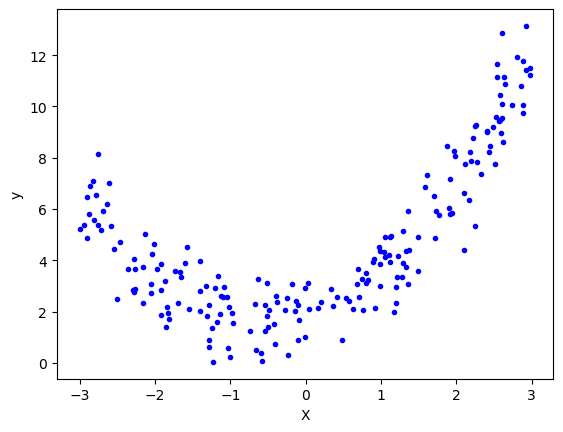

In [45]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)

In [50]:
r2_score(y_test, y_pred)

0.3246778937231387

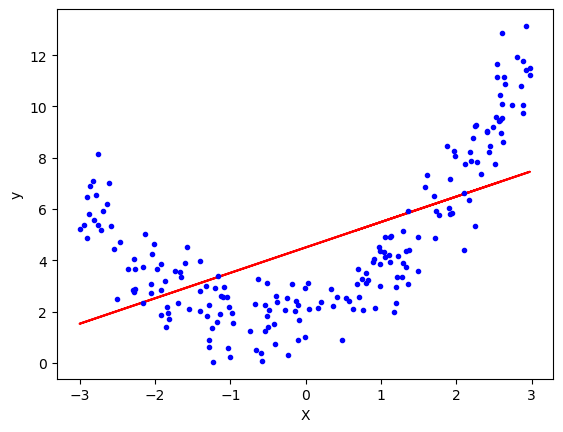

In [51]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X,y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Applying Polynomial Linear Regression (degree=2)

In [52]:
poly = PolynomialFeatures(degree=2)
# PolynomialFeatures from sklearn.preprocessing is used to apply polynomial regression 
# after applying the above statement each input column will will have 3 columns divided now 
# X^0 X^1 X^2
# poly = PolynomialFeatures(degree=2,include_bias=False) then X^0 will not get

In [81]:
poly.powers_

array([[0],
       [1],
       [2]])

In [53]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [54]:
print(X_train[0])
print(X_train_trans[0])

[2.57175465]
[1.         2.57175465 6.61392198]


In [55]:
X_train

array([[ 2.57175465],
       [ 1.37803001],
       [-2.8113888 ],
       [-0.49166668],
       [-0.41635834],
       [ 2.59699979],
       [-0.59123705],
       [ 2.40508886],
       [-1.5471843 ],
       [-1.22673187],
       [-0.66605329],
       [-1.12648965],
       [-1.16368495],
       [ 0.98980515],
       [ 1.1321667 ],
       [-2.93756219],
       [ 0.68988268],
       [-0.62609847],
       [-0.08369543],
       [ 1.77066238],
       [-0.27309862],
       [ 2.24240435],
       [ 2.88082896],
       [ 1.58504773],
       [-2.46843579],
       [-1.09986793],
       [-1.86616182],
       [ 0.70312637],
       [ 2.516154  ],
       [ 2.80055647],
       [-1.3200073 ],
       [ 1.23041305],
       [ 2.12001822],
       [-1.31076931],
       [-1.97881998],
       [-0.10541856],
       [-0.0132095 ],
       [-1.67013696],
       [-2.039563  ],
       [ 2.57837489],
       [ 1.91894535],
       [ 1.29571051],
       [ 0.88959281],
       [ 1.10252991],
       [-2.85570052],
       [-0

In [56]:
X_train_trans

array([[ 1.00000000e+00,  2.57175465e+00,  6.61392198e+00],
       [ 1.00000000e+00,  1.37803001e+00,  1.89896671e+00],
       [ 1.00000000e+00, -2.81138880e+00,  7.90390698e+00],
       [ 1.00000000e+00, -4.91666681e-01,  2.41736125e-01],
       [ 1.00000000e+00, -4.16358344e-01,  1.73354270e-01],
       [ 1.00000000e+00,  2.59699979e+00,  6.74440790e+00],
       [ 1.00000000e+00, -5.91237045e-01,  3.49561244e-01],
       [ 1.00000000e+00,  2.40508886e+00,  5.78445244e+00],
       [ 1.00000000e+00, -1.54718430e+00,  2.39377927e+00],
       [ 1.00000000e+00, -1.22673187e+00,  1.50487108e+00],
       [ 1.00000000e+00, -6.66053294e-01,  4.43626990e-01],
       [ 1.00000000e+00, -1.12648965e+00,  1.26897893e+00],
       [ 1.00000000e+00, -1.16368495e+00,  1.35416266e+00],
       [ 1.00000000e+00,  9.89805153e-01,  9.79714241e-01],
       [ 1.00000000e+00,  1.13216670e+00,  1.28180143e+00],
       [ 1.00000000e+00, -2.93756219e+00,  8.62927161e+00],
       [ 1.00000000e+00,  6.89882676e-01

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(X_test_trans)

In [60]:
r2_score(y_test,y_pred)

0.8901437637447024

In [61]:
lr.coef_
# X^0 X^1 X^2

array([[0.        , 0.9264171 , 0.79067257]])

In [62]:
lr.intercept_

array([1.99935226])

In [63]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

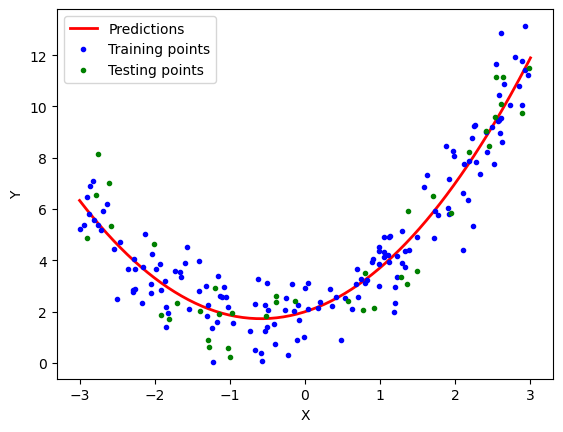

In [64]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [71]:
def poynomial_regression(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler" , std_scaler),
        ("lin_reg" , lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, "r", label="Degree"+str(degree), linewidth=2)
    plt.plot(X_train,y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3.,0,10])
    plt.show()

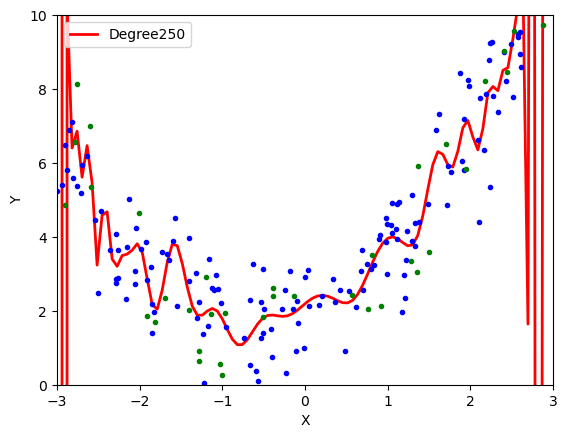

In [80]:
poynomial_regression(250)

C:\Users\Ishita\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


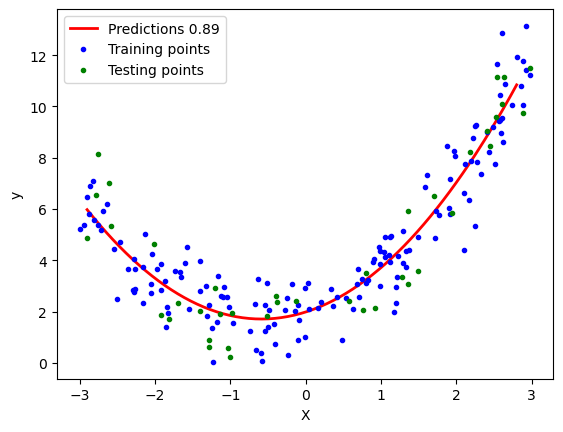

In [82]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Multiple Polynomial Linear Regression

In [103]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [104]:
px.data.iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


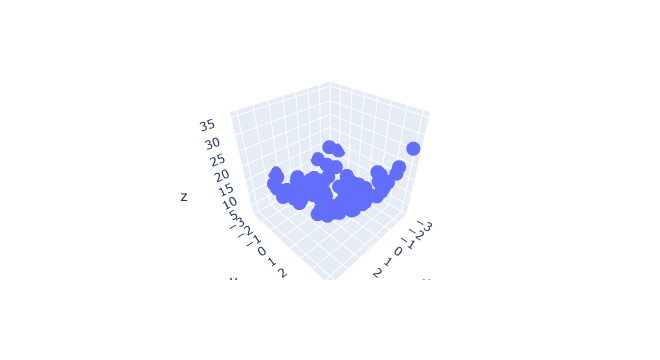

In [105]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [106]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)


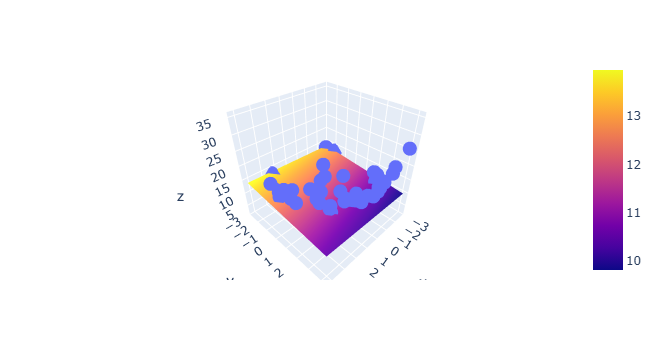

In [107]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [108]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [137]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [138]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [139]:
y.shape

(100, 1)

In [140]:
X.shape

(200, 1)

In [141]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [142]:
X_test_multi = poly.transform(final)

In [143]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

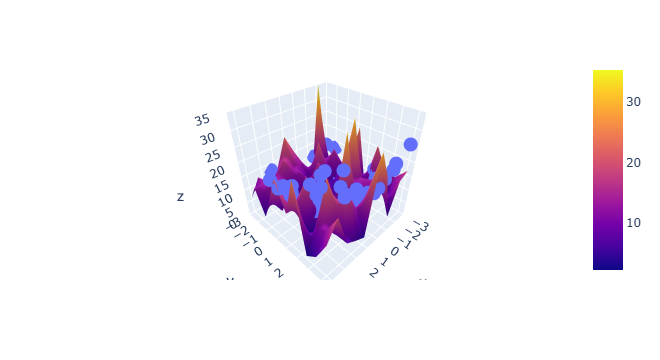

In [144]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()